In [2]:
import pandas as pd
import numpy as np
import os 
from glob import glob
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from shapely.geometry import Point             # Imported for constraint checking
from shapely.geometry.polygon import Polygon



In [2]:
#store here the directory where the files of wind data are present
data_folder = '/home/hardik/shell.ai hackathon/resources/Shell_Hackathon Dataset/custom_datasets'
# all the files in the folder
files = glob(os.path.join(data_folder + '/*.csv'))

In [4]:
def plot_turbines(X,Y):
    plt.figure(figsize = (10,8))
    plt.plot([50,3950,3950,50,50],[50,50,3950,3950,50],linestyle = '--',c = 'r')
    plt.scatter(X,Y,s = 100,marker = '*')
    
    
def save_df(X,Y,name):
    df = pd.DataFrame({'x':X,'y':Y})
    df.to_csv('custom_datasets/'+name + '.csv',index = False)

In [4]:
    
def checkConstraints(turb_coords, turb_diam = 100):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Checks if the turbine configuration satisfies the two
    constraints:(i) perimeter constraint,(ii) proximity constraint 
    Prints which constraints are violated if any. Note that this 
    function does not quantifies the amount by which the constraints 
    are violated if any. 
    
    :called from
        main 
        
    :param
        turb_coords - 2d np array containing turbine x,y coordinates
        turb_diam   - Diameter of the turbine (m)
    
    :return
        None. Prints messages.   
    """
    bound_clrnc      = 50
    prox_constr_viol = False
    peri_constr_viol = False
    
    # create a shapely polygon object of the wind farm
    farm_peri = [(0, 0), (0, 4000), (4000, 4000), (4000, 0)]
    farm_poly = Polygon(farm_peri)
    
    # checks if for every turbine perimeter constraint is satisfied. 
    # breaks out if False anywhere
    for turb in turb_coords:
        turb = Point(turb)
        inside_farm   = farm_poly.contains(turb)
        correct_clrnc = farm_poly.boundary.distance(turb) >= bound_clrnc
        if (inside_farm == False or correct_clrnc == False):
            peri_constr_viol = True
            break
    
    # checks if for every turbines proximity constraint is satisfied. 
    # breaks out if False anywhere
    points = []
    for i,turb1 in enumerate(turb_coords):
        for turb2 in np.delete(turb_coords, i, axis=0):
            if  np.linalg.norm(turb1 - turb2) < 4*turb_diam:
                prox_constr_viol = True
                points.append([turb1,turb2])
                break
    
    # print messages
    if  peri_constr_viol  == True  and prox_constr_viol == True:
          print('Somewhere both perimeter constraint and proximity constraint are violated\n')
    elif peri_constr_viol == True  and prox_constr_viol == False:
          print('Somewhere perimeter constraint is violated\n')
    elif peri_constr_viol == False and prox_constr_viol == True:
          print('Somewhere proximity constraint is violated\n')
    else: print('Both perimeter and proximity constraints are satisfied !!\n')
        
    return points

# Score Table

In [5]:
df = pd.read_csv(r'/home/hardik/shell.ai hackathon/resources/data_scores.csv',index_col = 0)
df.columns = ['AEP']
df = df.T
df

,pattern6.csv,pattern3.csv,pattern5.csv,pattern4.csv,turbine_loc_test.csv,pattern2.csv,pattern7.csv,pattern9.csv,manual1.csv,pattern10.csv,kmeans.csv,pattern8.csv,manual2.csv,pattern1.csv
AEP,522.600613,517.980881,517.115354,522.04937,498.153956,521.386081,524.534373,524.144935,523.433358,524.098719,505.538857,524.325519,524.743462,516.889758


# the given turbine loc test file

In [6]:
data1 = pd.read_csv(files[0])
print(data1.shape)
data1.head()

(50, 2)


,x,y
0,51.0,51.000000
1,51.0,484.111111
2,51.0,917.222222
3,51.0,1350.333333
4,51.0,1783.444444


In [7]:
X = np.array(data1)
X.shape

(50, 2)

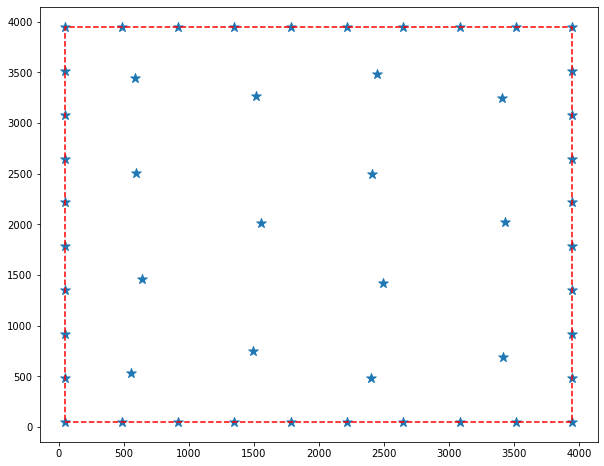

In [8]:
plot_turbines(X[:,0],X[:,1])

## APE locally - 498.153956, Hackerearth - 517.52218 

In [136]:
checkConstraints(X)

Both perimeter and proximity constraints are satisfied !!



[]

# Manually generating some points

In [137]:
data2 = np.array([[a,b] for a in np.linspace(51,3949, 10) for b in np.linspace(51, 3949, 5)])


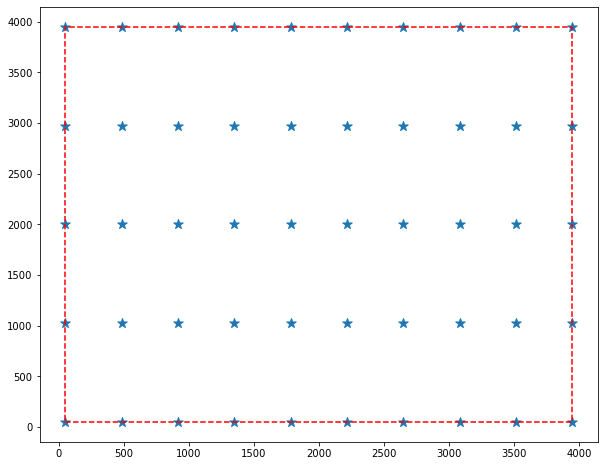

In [138]:
plot_turbines(data2[:,0],data2[:,1])

## AEP - locally - 523.433358, Hackerearth - 542.47219

In [139]:
save_df(data2[:,0],data2[:,1],'manual1')

## Manual - 2

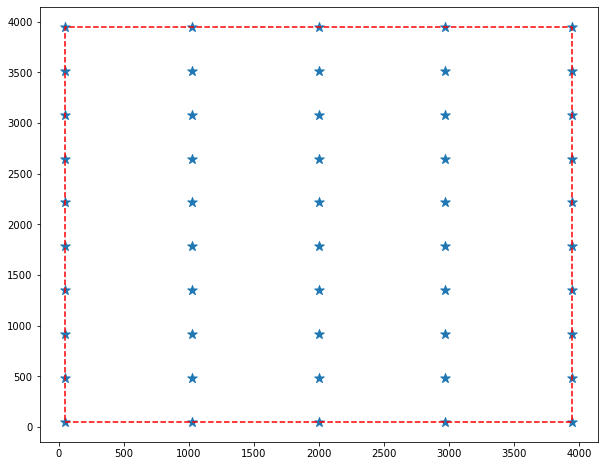

In [5]:
data2 = np.array([[a,b] for a in np.linspace(51,3949, 5) for b in np.linspace(51, 3949, 10)])


plot_turbines(data2[:,0],data2[:,1])

## AEP - locally - 524.743462, Hackerearth - 543.49748

In [141]:
save_df(data2[:,0],data2[:,1],'manual2')

# Using K means

In [9]:
X = np.random.uniform(0,4000,(5000,2))

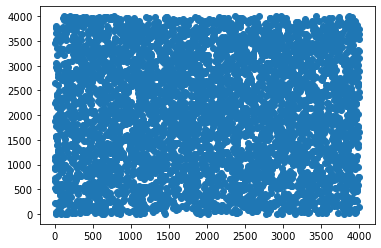

In [143]:
plt.scatter(X[:,0],X[:,1])

In [144]:
clustering = KMeans(n_clusters = 50,n_init=50)
clustering.fit(X)

KMeans(n_clusters=50, n_init=50)

In [145]:
points = clustering.cluster_centers_

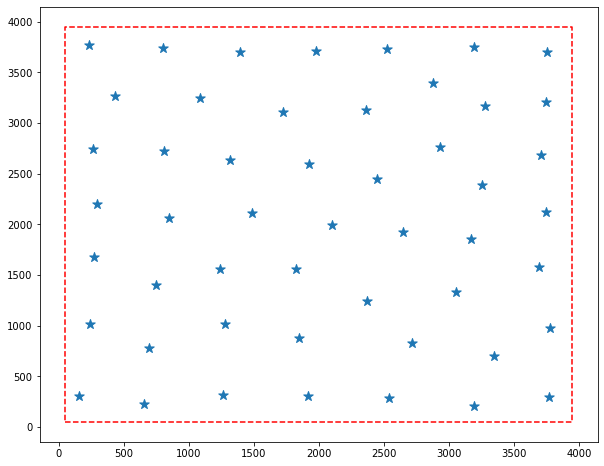

In [146]:
plot_turbines(points[:,0],points[:,1])

## AEP - manual 505.538857, Hackerearth - 524.83

In [147]:
save_df(points[:,0],points[:,1],'kmeans')

In [148]:
points.shape

(50, 2)

# Random Values

In [150]:
X = np.random.uniform(50,3950,(50,2))
# checkConstraints(X)

# Algorithm

In [151]:
import random

radius = 400
rangeX = (50, 3950)
rangeY = (50,3950)
qty = 50  # or however many points you want

# Generate a set of all points within 200 of the origin, to be used as offsets later
# There's probably a more efficient way to do this.
deltas = set()
for x in range(-radius, radius+1):
    for y in range(-radius, radius+1):
        if x*x + y*y <= radius*radius:
            deltas.add((x,y))

randPoints = []
excluded = set()
i = 0
while i<qty:
    x = random.randrange(*rangeX)
    y = random.randrange(*rangeY)
    if (x,y) in excluded: continue
    randPoints.append((x,y))
    i += 1
    excluded.update((x+dx, y+dy) for (dx,dy) in deltas)
print randPoints

# Other patterns

(50, 2)


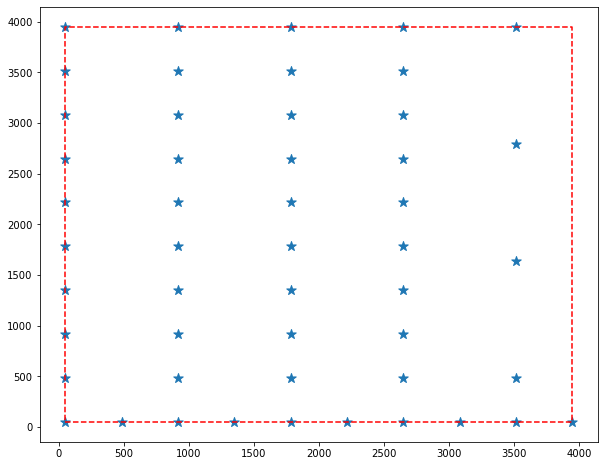

In [152]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11,3949,9)])
data3 = np.array([[917.22125,i] for i in np.linspace(484.11111,3949,9)])
data4 = np.array([[1783.44375,i] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[2649.66625,i] for i in np.linspace(484.11111,3949,9)])
data6 = np.array([[3515.88875,i] for i in np.linspace(484.11111,3949,4)])

data = np.concatenate([data1,data2,data3,data4,data5,data6]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

## Pattern 1 - Locally -  516.889758, Hackerearth - 535.325

In [153]:
save_df(data[:,0],data[:,1],'pattern1')

# Pattern 2

(50, 2)


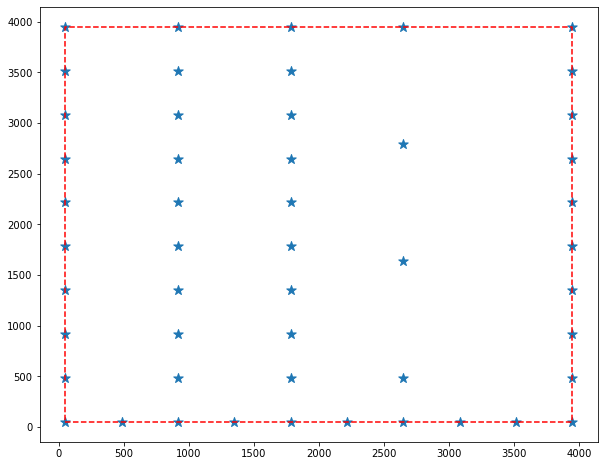

In [154]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11,3949,9)])
data3 = np.array([[917.22125,i] for i in np.linspace(484.11111,3949,9)])
data4 = np.array([[1783.44375,i] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[2649.66625,i] for i in np.linspace(484.11111,3949,4)])
data6 = np.array([[3949,i] for i in np.linspace(484.11111,3949,9)])

data = np.concatenate([data1,data2,data3,data4,data5,data6]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

## PAttern2 - Locally = 521.386, Hackerearth - 539.874

In [12]:
df['pattern2.csv']

AEP    521.386081
Name: pattern2.csv, dtype: float64

In [155]:
save_df(data[:,0],data[:,1],'pattern2')

# Pattern 3

(50, 2)


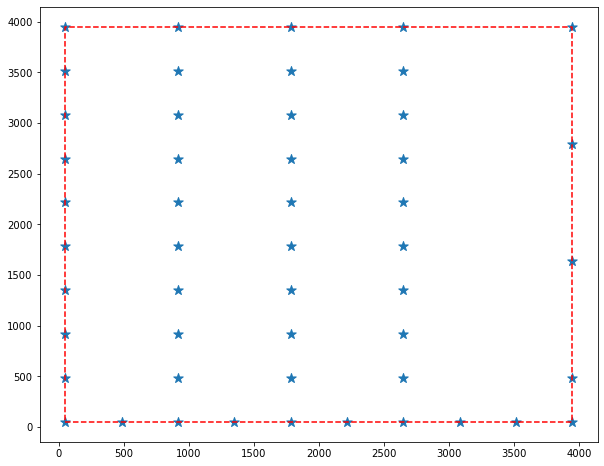

In [156]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11,3949,9)])
data3 = np.array([[917.22125,i] for i in np.linspace(484.11111,3949,9)])
data4 = np.array([[1783.44375,i] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[2649.66625,i] for i in np.linspace(484.11111,3949,9)])
data6 = np.array([[3949,i] for i in np.linspace(484.11111,3949,4)])

data = np.concatenate([data1,data2,data3,data4,data5,data6]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

## Pattern3 - Locally = 517.98, Hackerearth = 536.434

In [13]:
df['pattern3.csv']

AEP    517.980881
Name: pattern3.csv, dtype: float64

In [157]:
save_df(data[:,0],data[:,1],'pattern3')

# Pattern 4

(50, 2)


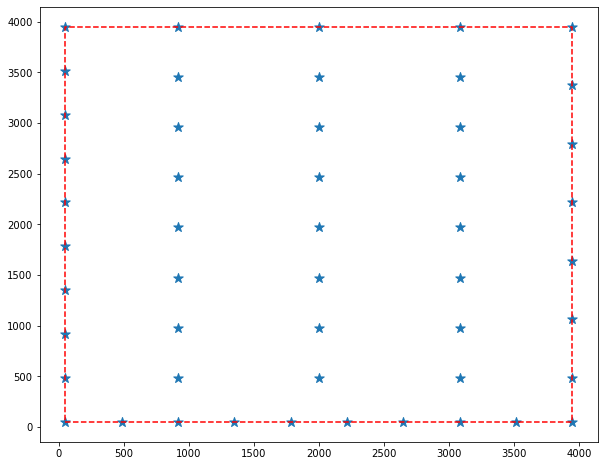

In [158]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11,3949,9)])
data3 = np.array([[a,b] for a in np.linspace(917.22125,3082.7775,3) for b in np.linspace(484.11,3949,8)])
data4 = np.array([[3949,i] for i in np.linspace(484.11,3949,7)])
data = np.concatenate([data1,data2,data3,data4]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

## Pattern 4 - Locally - 522.04937 , Hackerearth - 540.95

In [14]:
df['pattern4.csv']

AEP    522.04937
Name: pattern4.csv, dtype: float64

In [159]:
save_df(data[:,0],data[:,1],'pattern4')

In [160]:
checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]

In [161]:
data.shape

(50, 2)

# Pattern 5

(50, 2)


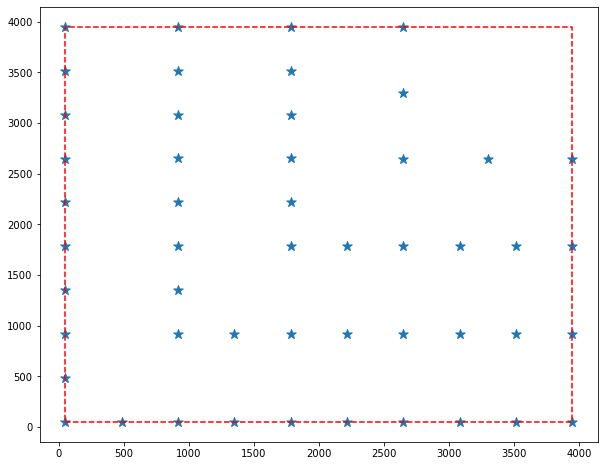

In [162]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[917.22222222,i] for i in np.linspace(917.22222222,3950,8)])
data4 = np.array([[i,917.22222222] for i in np.linspace(917.22222222,3950,8)[1:]])
data5 = np.array([[1783.44444444,i] for i in np.linspace(1783.44444444,3950,6)])
data6 = np.array([[i,1783.44444444] for i in np.linspace(1783.44444444,3950,6)[1:]])
data7 = np.array([[2649.66666663,i] for i in np.linspace(2649.66666663,3950,3)])
data8 = np.array([[i,2649.66666663] for i in np.linspace(2649.66666663,3950,3)[1:]])
data = np.concatenate([data1,data2,data3,data4,data5,data6,data7,data8]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

## Pattern 5 - Locally - 517, Hackerearth - 536

In [15]:
df['pattern5.csv']

AEP    517.115354
Name: pattern5.csv, dtype: float64

In [163]:
save_df(data[:,0],data[:,1],'pattern5')

# Pattern 6

(36, 2)


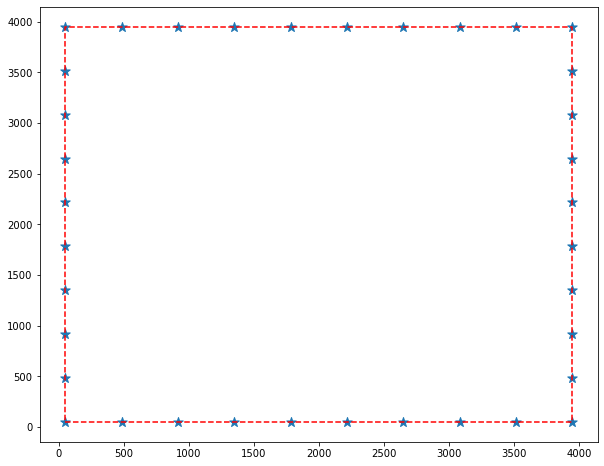

In [194]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])

data = np.concatenate([data1,data2,data3,data4]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

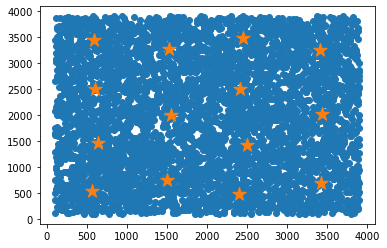

In [195]:
X = np.random.uniform(100,3900,(5000,2))

plt.scatter(X[:,0],X[:,1])

clustering = KMeans(n_clusters = 14,n_init=50)
clustering.fit(X)


points = clustering.cluster_centers_
plt.scatter(points[:,0],points[:,1],marker = '*',s = 200)

(50, 2)


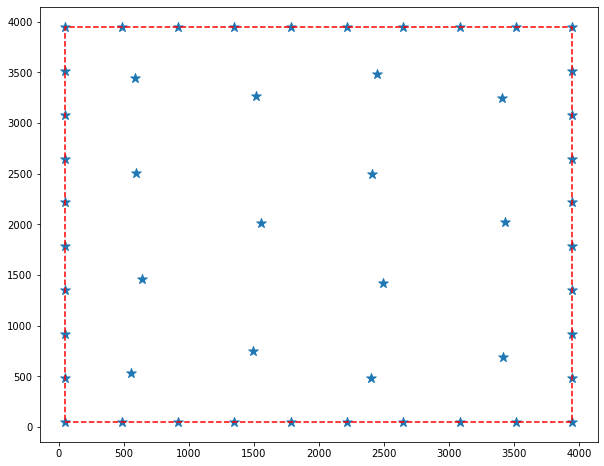

In [196]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = points
data = np.concatenate([data1,data2,data3,data4,data5]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

# Pattern 6, Locally - 522.60, Hackerearth - 541.77

In [16]:
df['pattern6.csv']

AEP    522.600613
Name: pattern6.csv, dtype: float64

In [197]:
save_df(data[:,0],data[:,1],'pattern6')

# Pattern 7

(36, 2)


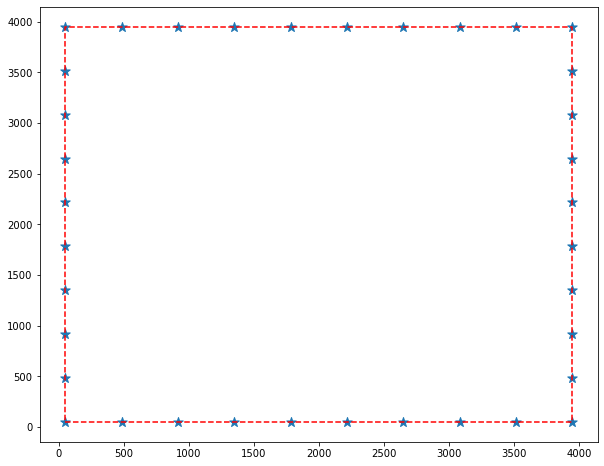

In [198]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])

data = np.concatenate([data1,data2,data3,data4]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

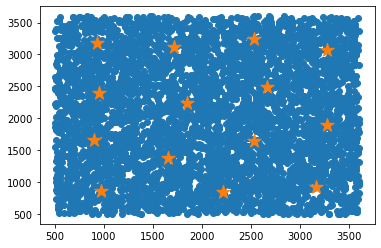

In [199]:
X = np.random.uniform(500,3600,(5000,2))

plt.scatter(X[:,0],X[:,1])

clustering = KMeans(n_clusters = 14,n_init=50)
clustering.fit(X)


points = clustering.cluster_centers_
plt.scatter(points[:,0],points[:,1],marker = '*',s = 200)

(50, 2)


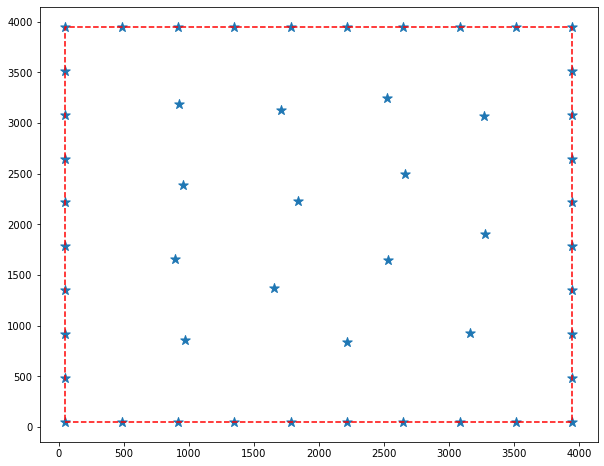

In [200]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = points
data = np.concatenate([data1,data2,data3,data4,data5]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

## Pattern -7 , Locally = 524.534, Hackerearth = 543.746

In [17]:
df['pattern7.csv']

AEP    524.534373
Name: pattern7.csv, dtype: float64

In [201]:
save_df(data[:,0],data[:,1],'pattern7')

In [202]:
checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]

# Pattern 8

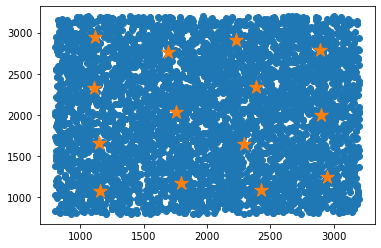

In [24]:
# decreasing the range of the points
X = np.random.uniform(800,3200,(5000,2))

plt.scatter(X[:,0],X[:,1])

clustering = KMeans(n_clusters = 14,n_init=50)
clustering.fit(X)


points = clustering.cluster_centers_
plt.scatter(points[:,0],points[:,1],marker = '*',s = 200)

(50, 2)


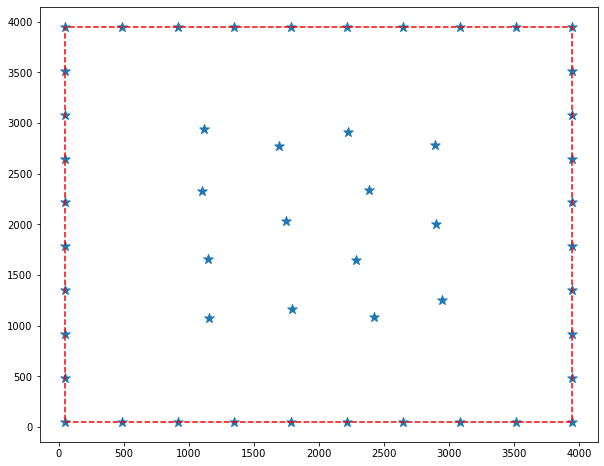

In [25]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = points
data = np.concatenate([data1,data2,data3,data4,data5]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

## Pattern - 8 - Locally = 524.325, Hackerearth = 543.76


In [26]:
df['pattern8.csv']

AEP    524.325519
Name: pattern8.csv, dtype: float64

In [27]:
save_df(data[:,0],data[:,1],'pattern8')

In [235]:
checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]

# Pattern 9

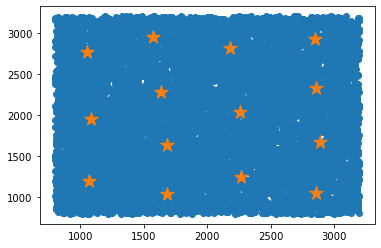

In [20]:
# same as pattern 8, but with more points considerd for clustering
X = np.random.uniform(800,3200,(10000,2))

plt.scatter(X[:,0],X[:,1])

clustering = KMeans(n_clusters = 14,n_init=50)
clustering.fit(X)


points = clustering.cluster_centers_
plt.scatter(points[:,0],points[:,1],marker = '*',s = 200)

(50, 2)


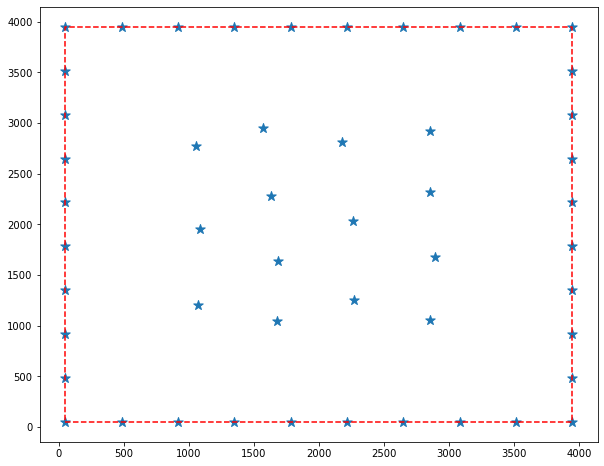

In [21]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = points
data = np.concatenate([data1,data2,data3,data4,data5]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

## Patern 9 - Locally  = 524.14, hackerearth - 543.9

In [22]:
df['pattern9.csv']

AEP    524.144935
Name: pattern9.csv, dtype: float64

In [23]:
save_df(data[:,0],data[:,1],'pattern9')

In [231]:
checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]

In [239]:
points = clustering.cluster_centers_
min(points[:,0])

1070.1634581503604

In [240]:
max(points[:,0])

2893.9198860356046

# Pattern 10

(50, 2)


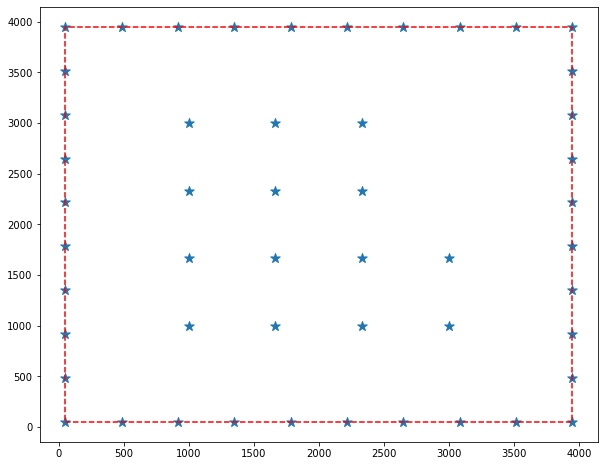

In [50]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[a,b] for a in np.linspace(1000,3000,4 ) for b in np.linspace(1000,3000,4)])
data5 = data5[:-2]
data = np.concatenate([data1,data2,data3,data4,data5]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

In [51]:
save_df(data[:,0],data[:,1],'pattern10')

checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]

In [52]:
np.linspace(51,3949,10,retstep=True)

(array([  51.        ,  484.11111111,  917.22222222, 1350.33333333,
        1783.44444444, 2216.55555556, 2649.66666667, 3082.77777778,
        3515.88888889, 3949.        ]),
 433.1111111111111)

## Pattern - 11

4 - 4 - 4 - 2

(50, 2)


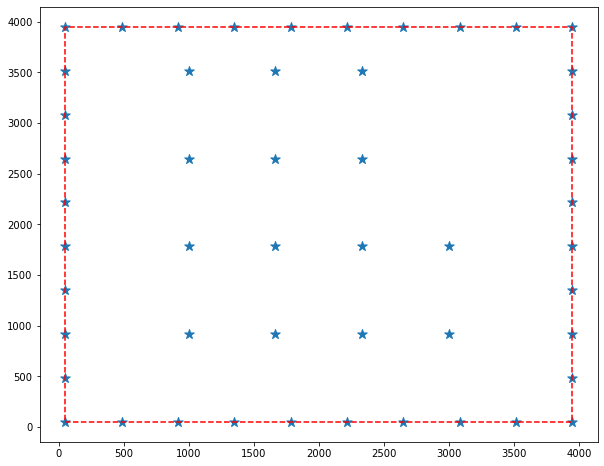

In [47]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[i,j] for i in np.linspace(1000,3000,4) for j in [917.22222222,1783.44444444,2649.66666667,
        3515.88888889]])[:-2]

data = np.concatenate([data1,data2,data3,data4,data5]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

## Hackerearth -  543.21

In [49]:
save_df(data[:,0],data[:,1],'pattern11')

checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]

# Pattern 12 

5 - 5 - 4

(50, 2)


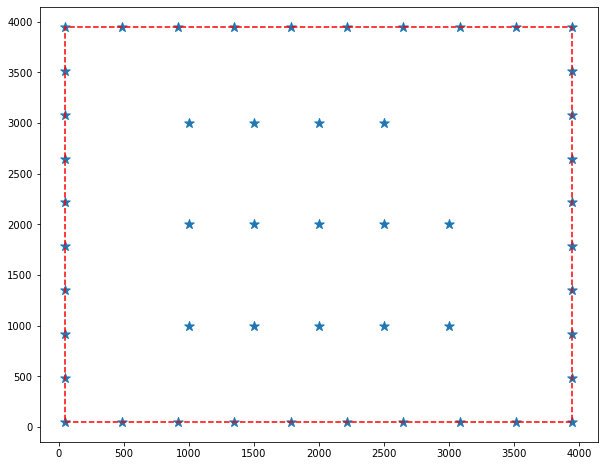

In [54]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[i,j] for i in np.linspace(1000,3000,5) for j in [1000,2000,3000]])[:-1]

data = np.concatenate([data1,data2,data3,data4,data5]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

## Hackerearth -  545.54

In [55]:
save_df(data[:,0],data[:,1],'pattern12')

checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]

# Pattern 13 

6 - 6 - 2

(50, 2)


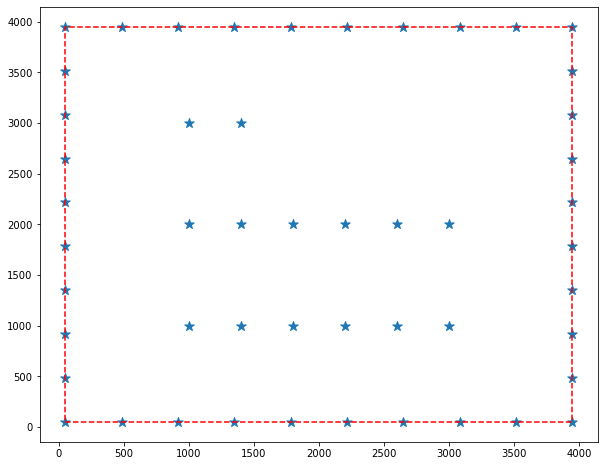

In [65]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[i,j] for j in [1000,2000,3000] for i in np.linspace(1000,3000,6) ])[:-4]

data = np.concatenate([data1,data2,data3,data4,data5]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

## Hackerearth -  541.94

In [62]:
save_df(data[:,0],data[:,1],'pattern13')

checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]

# Pattern 13 - a

(50, 2)


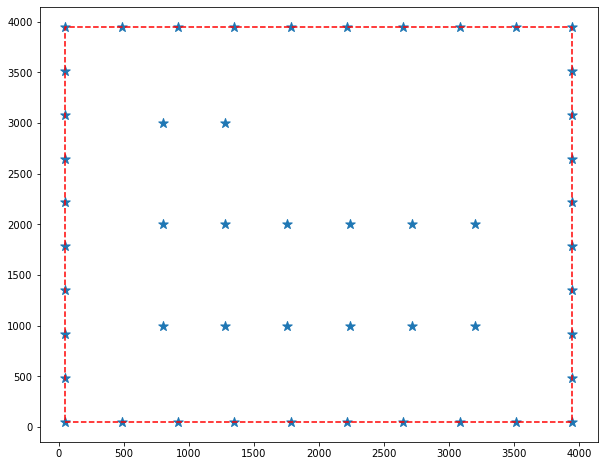

In [67]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[i,j] for j in [1000,2000,3000] for i in np.linspace(800,3200,6) ])[:-4]

data = np.concatenate([data1,data2,data3,data4,data5]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

## Hackerearth -  544.46

In [68]:
save_df(data[:,0],data[:,1],'pattern13a
        
        ')

checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]

# Trying more variations in pattern 12

(50, 2)


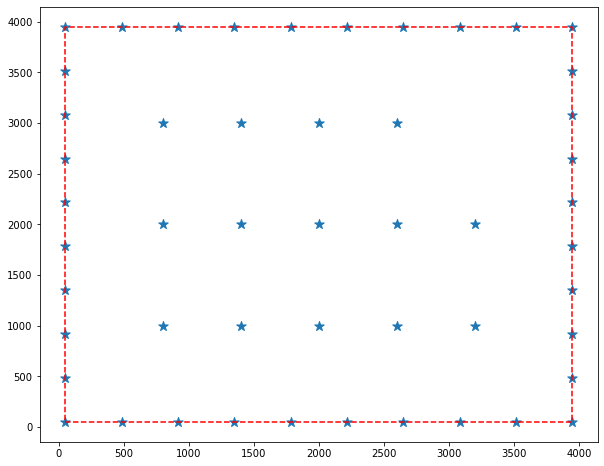

In [69]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[i,j] for i in np.linspace(800,3200,5) for j in [1000,2000,3000]])[:-1]

data = np.concatenate([data1,data2,data3,data4,data5]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

## Hackerearth -  544.14

In [70]:
save_df(data[:,0],data[:,1],'pattern12a')

checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]